<a href="https://colab.research.google.com/github/rferina/ml_foundations_coursework/blob/main/Rachel_Ferina_HW03_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Linear Regression

During this week's lab we leveraged sklearn to create several linear regression models.

In this assignment, you will code a small program to compute the coefficients for a single-feature regression model -> $y = ax + b$

* Create a new class named *MyLinearRegression*
  * The constructor won't do much other than instantiating the object.
* Code a class method called *fit* that estimates the *a* and *b* coefficients
  * Make the coefficients accessible as object attributes *self.a* and *self.b*
  * The *fit* method will receive 2 parameters:
    1. *data* - The data from the feature to use for regression (pd.Series)
    2. *labels* - The ground-truth labels (pd.Series)
  * Make *data* and *labels* available as object attributes
  * Use the formulas from the analytical solution to estimate *a* and *b*:

>>>>>$a = \frac{n \sum y_i x_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}$

>>>>>$b = \frac{\sum y_i}{n} - a\frac{\sum x_i}{n}$

* Code the *'_ _str_ _'* method to create a string representation of *MyLinearRegression* objects
  * Use the values of the *a* and *b* coefficients if the model has been fitted to data.
  * Otherwise, use a message indicating that the object has not been fitted yet.
* Code a class method called *predict* that returns the predicted values for an array of inputs
  * The method should be publicly accessible and receive 1 parameter:
    * *test_data* - A Pandas Series with the input feature values to be used for prediction.
  * The method should return a Pandas Series with the predicted values

* Code a class method *plot_fit* that visualizes the fitted line against the data used for training.
  * Refer to the end of this notebook for examples of the use and results of calling this method.

In [ ]:
import os
from google.colab import drive


mount_point = '/content/drive'
drive.mount(mount_point)

drive_dir = os.path.join(mount_point, "MyDrive")
drive_dir

Mounted at /content/drive


'/content/drive/MyDrive'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#REMEMBER THIS MIGHT BE DIFFERENT IN YOUR OWN DRIVE
dataset_file = "real_estate.csv"
housing_df = pd.read_csv(os.path.join(drive_dir, dataset_file))
housing_df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
#Include your code here
class MyLinearRegression(object):

  def __init__(self):
    '''Initiates attribute placeholders.'''

    # set attributes to None as placeholders
    self.data = None
    self.labels = None
    self.test_data = None
    self.a = None
    self.b = None


  def fit(self, data, labels):
    '''Takes in training data features and labels, returns slope and y-intercept
    attributes (analytical solutions).'''

    # define attributes
    self.data = data
    self.labels = labels

    # length of the features for use in slope and y-intercept calculations
    n = len(self.data)

    # calculate the numerator for the slope
    a_numerator = n * sum(self.labels * self.data)  - (sum(self.data) * sum(self.labels))

    # calculate slope
    self.a = a_numerator / ((n * sum(self.data ** 2)) - (sum(self.data)) ** 2)

    # calculate the y intercept
    self.b = ((sum(self.labels))/n) - (self.a * ((sum(self.data))/n))

    return self.a, self.b


  def __str__(self):
    '''If slope and y-intercept attributes are None, returns warning message.
    If slope and y-intercept attributes are not None, returns the coefficients
    as a string.'''

    # return slope and y intercept if the attributes aren't None
    if (self.a != None) & (self.b != None):
      return "LR coefficients a = " + str(self.a) + " b = " + str(self.b)

    # if the attributes are None, return a warning message
    return "The object has not been fitted to the training data."


  def predict(self, test_data):
    '''Takes in test data, returns predicted values as a Pandas series.'''

    # define attribute
    self.test_data = test_data

    y_pred = []
    # calculate y = ax + b on test data
    for value in self.test_data:
      y_pred.append((self.a * value)  + self.b)

    # convert to Pandas series
    return pd.Series(y_pred)


  def plot_fit(self):
    '''Plots a scatter plot of the training data with a line of best fit.'''

    # subplots setup
    fig, ax = plt.subplots()

    # dataframe for graphing features, labels, and line of best fit
    graph_df = pd.DataFrame({'Features': self.data, 'Labels': self.labels, 'Best_Fit_Line': self.b + (self.a * self.data)})

    # graph training data scatter plot
    graph_df.plot.scatter(ax=ax, x='Features', y='Labels')

    # graph line of best fit
    graph_df.plot(ax=ax, x='Features', y='Best_Fit_Line', linestyle='dashed', color='red')

    # graph setup
    plt.title('LR fit')
    plt.ylabel('Prediction')
    plt.xlabel('Feature')
    plt.grid()
    plt.show()




In [ ]:
#Separating features and label
X = housing_df.drop("Y house price of unit area", axis=1)
y = housing_df['Y house price of unit area']

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)
print(f'X train shape = {X_train.shape}')
print(f'X test shape = {X_test.shape}')

X train shape = (331, 7)
X test shape = (83, 7)


In [ ]:
my_lr_test = MyLinearRegression()
my_lr_test.fit(X_train["X5 latitude"], y_train)
print(my_lr_test)

y_pred = my_lr_test.predict(X_test["X5 latitude"])

#Root Mean Squared Error
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse_test}")

LR coefficients a = 630.5341849002966 b = -15705.662410483375
RMSE = 11.845522143919279


In [ ]:
# Usage example
my_lr = MyLinearRegression()
my_lr.fit(X_train["X5 latitude"], y_train)
print(my_lr)

y_pred = my_lr.predict(X_test["X5 latitude"])
#print(y_pred)

#Root Mean Squared Error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse}")

LR coefficients a = 630.5341849002966 b = -15705.662410483375
RMSE = 11.845522143919279


Compare the results of your model with the one from Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train[["X5 latitude"]], y_train) #Notice sklearn expects a DF not a Series as the training feature data
print(f"Sklearn coefficients a = {sklearn_lr.coef_[0]} b = {sklearn_lr.intercept_}")

y_pred = sklearn_lr.predict(X_test[["X5 latitude"]])
# print(y_pred)

#Root Mean Squared Error
sklearn_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {sklearn_rmse}")

Sklearn coefficients a = 630.5341834544749 b = -15705.662374382442
RMSE = 11.845522140979554


Your results should be very similar to Sklearn's

In [ ]:
a_diff = abs(my_lr_test.a - sklearn_lr.coef_[0])
b_diff = abs(my_lr_test.b - sklearn_lr.intercept_)
rmse_diff = abs(rmse_test - sklearn_rmse)
print(f"A diff = {a_diff} B diff = {b_diff} RMSE diff = {rmse_diff}")

A diff = 1.445821681045345e-06 B diff = 3.610093335737474e-05 RMSE diff = 2.9397249079465837e-09


The coefficients and RMSE are very similar to Sklearn's; the differences are minute.

Use the *plot_fit* method to show how your model fits the training data

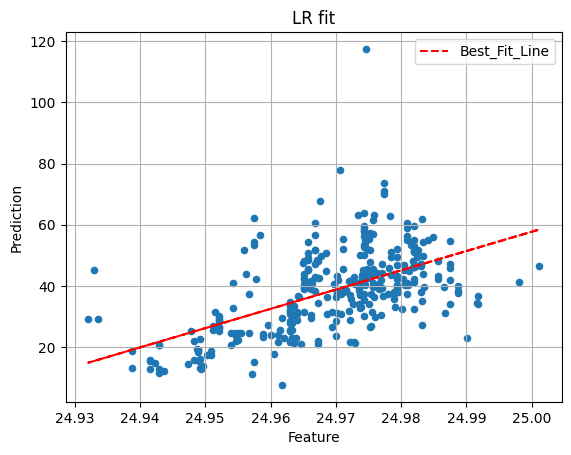

In [ ]:
my_lr_test.plot_fit()